<a href="https://colab.research.google.com/github/keinam53/Machine_learning/blob/main/Uczenie_nadzorowane/3_Klasyfikacja/3_Drzewa_decyzyjne_gini_entropia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Drzewa decyzyjne - gini, entropia
1. [Import bibliotek](#1)
2. [Wskaźnik Giniego](#2)
3. [Entropia](#3)
4. [Zysk informacyjny](#4)

### <a name='1'></a> Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
np.random.seed(42)

### <a name='2'></a>  Wskaźnik Giniego
Miara zanieczyszczenia
- węzeł jest czysty (wszystkie próbki w węźle należą do tej samej klasy), gdy Gini = 0

$$G_i = 1 - \sum_{k=1}^{n}p_{i,k}^{2}$$

$p_{i, k}$ - współczynnik występowania klas k wśród próbek uczących w $i$-tym węźle

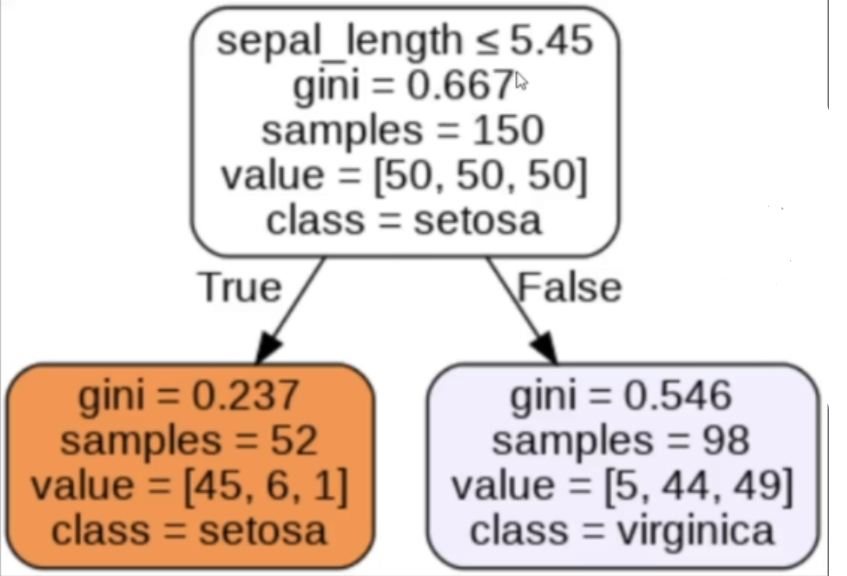

Gini dla korzenia (root) - poziom 0

In [2]:
1 - (50 / 150) ** 2 - (50 / 150) ** 2 - (50 / 150) ** 2

0.6666666666666665

Poziom 1, węzeł lewy

In [3]:
1 - (45 / 52) ** 2 - (6 / 52) ** 2 - (1 / 52) ** 2

0.23742603550295852

Poziom 1, węzeł prawy

In [4]:
1 - (5 / 98) ** 2 - (44 / 98) ** 2 - (49 / 98) ** 2

0.5458142440649729

### <a name='3'></a> Entropia

## $$Entropia  = -\sum_{k=1}^{n}p_{i} \cdot log_{2}(p_{i})$$

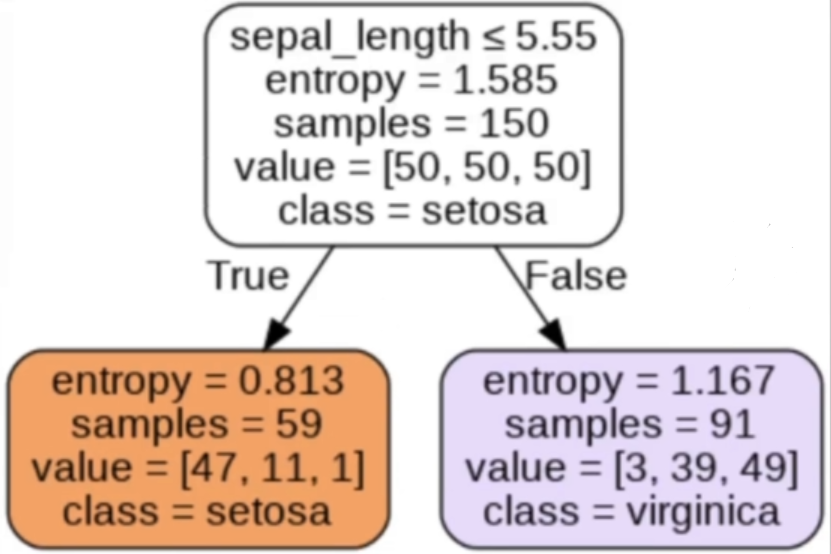

Entropia dla korzenia (root) - poziom 0

In [5]:
-((50 / 150) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150))

1.584962500721156

Poziom 1, węzeł lewy

In [6]:
-((47 / 59) * np.log2(47 / 59) + (11 / 59) * np.log2(11 / 59) + (1 / 59) * np.log2(1 / 59))

0.8128223064150747

Poziom 1, węzeł prawy

In [7]:
-((3 / 91) * np.log2(3 / 91) + (39 / 91) * np.log2(39 / 91) + (49 / 91) * np.log2(49 / 91))

1.167065448996099

In [8]:
from scipy.stats import entropy

print(f'0.5, 0.5: {entropy([0.5, 0.5], base=2)}')
print(f'0.8, 0.2: {entropy([0.8, 0.2], base=2)}')
print(f'0.95, 0.05: {entropy([0.95, 0.05], base=2)}')

0.5, 0.5: 1.0
0.8, 0.2: 0.7219280948873623
0.95, 0.05: 0.2863969571159562


In [18]:
def entropy(x):
    return -np.sum(x * np.log2(x))

print(f'0.5, 0.5: {entropy([0.5, 0.5])}')
print(f'0.8, 0.2: {entropy([0.8, 0.2])}')
print(f'0.95, 0.05: {entropy([0.95, 0.05])}')

0.5, 0.5: 1.0
0.8, 0.2: 0.7219280948873623
0.95, 0.05: 0.28639695711595625


0.9188195116732341

In [10]:
p = np.arange(0.01, 1.0, 0.01)
q = 1 - p
pq = np.c_[p, q]
pq[:10]

array([[0.01, 0.99],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.04, 0.96],
       [0.05, 0.95],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.08, 0.92],
       [0.09, 0.91],
       [0.1 , 0.9 ]])

In [11]:
entropies = []
for pair in pq:
    ent = entropy(pair)
    entropies.append(ent)

entropies[:10]

[0.08079313589591118,
 0.14144054254182067,
 0.1943918578315762,
 0.24229218908241482,
 0.28639695711595625,
 0.32744491915447627,
 0.3659236509002231,
 0.4021791902022728,
 0.43646981706410287,
 0.4689955935892812]

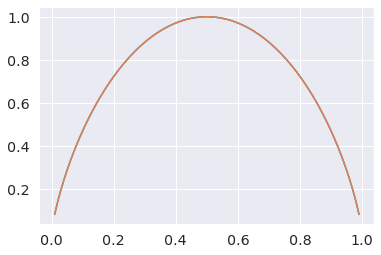

In [12]:
plt.plot(pq, entropies)

### Rozważmy dane

| ID | Dochód | Liczba osób w gospodarstwie | Wiarygodność | Udzielenie pożyczki |
|----|--------|-----------------------------|--------------|---------------------|
| 1  | niski  | 1                           | niska        | 0                   |
| 2  | niski  | 3                           | niska        | 0                   |
| 3  | średni | 4                           | niska        | 0                   |
| 4  | wysoki | 3                           | średnia      | 0                   |
| 5  | wysoki | 4                           | wysoka       | 1                   |
| 6  | niski  | 4                           | niska        | 0                   |
| 7  | średni | 2                           | średnia      | 1                   |
| 8  | wysoki | 3                           | wysoka       | 1                   |
| 9  | średni | 5                           | niska        | 0                   |
| 10 | średni | 1                           | wysoka       | 1                   |


Rozkład zmiennej Udzienie pożyczki:

| Udzielenie pożyczki | 0    | 1    |
|---------------------|------|------|
| $p_{i}$               | 6/10 | 4/10 |


Wzór na entropię:
###  $E = - \sum_{i=1}^{n}p_{i} \cdot log_{2}p_{i}$

Entropia po podziale:

###  $E_{after}  = \sum_{i=1}^{m} \frac{S_{i}}{S}Entropia(S_{i})$

gdzie 
$S$ - podział
$m$ - liczba podziałów



In [13]:
entropia = -((6 / 10) * np.log2(6 / 10) + (4 / 10) * np.log2(4 / 10))
entropia

0.9709505944546686

### Rozkład zmiennej `Wiarygodność`

|         | udział | udzielenie pożyczki = 0 | udzielenie pożyczki = 1 |  Entropia
|---------|--------|-------------------------|-------------------------|--------|
| niska   | 5/10   | 1                       | 0                       | 0
| średnia | 2/10   | 1/2                     | 1/2                     | 1
| wysoka  | 3/10   | 0                       | 1                       | 0

Entropia po podziale

In [15]:
entropia_wiarygodnosc = 5 / 10 * 0 + 2 / 10 * 1 + 3 / 10 * 0
entropia_wiarygodnosc

0.2

### Rozkład zmiennej  `Dochód`

|        | udział | udzielenie pożyczki = 0 | udzielenie pożyczki = 1 | Entropia
|--------|--------|-------------------------|-------------------------|----------|
| niski  | 3/10   | 1                       | 0                       |0
| sredni | 4/10   | 2/4                     | 2/4                     |1
| wysoki | 3/10   | 1/3                     | 2/3                     | 0.9183

Entropia po podziale

In [16]:
entropia_dochod = 3/10 * 0 + 4/10 * 1 + 3/10 * 0.9183
entropia_dochod

0.67549

### <a name='4'></a> Zysk informacyjny


$IG (Information\ Gain) = Entropia\ przed\ podziałem - Entropia\ po\ podziale$

In [17]:
ig_wiarygodnosc = entropia - entropia_wiarygodnosc
ig_dochod = entropia - entropia_dochod

print(f'Zysk informacyjny (IG): wiarygodność: {ig_wiarygodnosc}')
print(f'Zysk informacyjny (IG): dochód: {ig_dochod}')

Zysk informacyjny (IG): wiarygodność: 0.7709505944546686
Zysk informacyjny (IG): dochód: 0.29546059445466855


IG dla wiarygodność jest wyższa - ta zmienna jest w stanie podzielić dane na czystsze zbiory